![image](https://www.digital-discovery.tn/wp-content/uploads/2019/10/Blog-header-guide-7.png)

In [ ]:
#Nous allons importer les bibliothèques
!pip install transformers

CamemBERT is a state-of-the-art language model for French based on the RoBERTa architecture pretrained on the French subcorpus of the newly available multilingual corpus OSCAR.

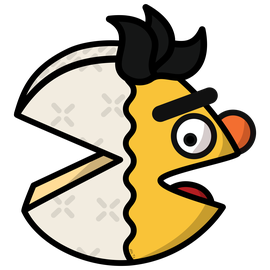


Dans notre cas, nous allons utiliser un modèle basé sur Roberta.

In [ ]:
#Nous allons importer le modèle 
#https://huggingface.co/etalab-ia/camembert-base-squadFR-fquad-piaf
#https://huggingface.co/saattrupdan/xlmr-base-texas-squad-fr
#https://camembert-model.fr/
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
the_model = 'saattrupdan/xlmr-base-texas-squad-fr'
tokenizer = AutoTokenizer.from_pretrained(the_model, do_lower_case=False)
model = AutoModelForQuestionAnswering.from_pretrained(the_model)

In [ ]:
# Exemple
contexte = 'Je suis Munier'
question = 'Quel est mon nom?'

encode = tokenizer.encode_plus(question, contexte, return_tensors='pt')
input_ids = encode['input_ids'].tolist()
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
for id, token in zip(input_ids[0], tokens):
  print('{:<12} {:>6}'.format(token, id))
  print('')

<s>               0

▁Quel         48556

▁est            437

▁mon           2667

▁nom           9901

?                32

</s>              2

</s>              2

▁Je             845

▁suis          5189

▁Mun          15030

ier            6815

</s>              2



In [ ]:
# Exemple d'inférence (question-réponse)
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)
sortie = nlp({'question':question, 'context':contexte})
print(sortie)

{'score': 0.8958887457847595, 'start': 8, 'end': 14, 'answer': 'Munier'}


In [ ]:
from textwrap import wrap

def question_response(model, contexto, nlp):

  # contexte
  print('Contexte:')
  print('-----------------')
  print('\n'.join(wrap(contexto)))

  # Loop question-responses:
  continuer = True
  while continuer:
    print('\nQuestion:')
    print('-----------------')
    question = str(input())

    continuer = question!=''

    if continuer:
      sortie = nlp({'question':question, 'context':contexte})
      print('\nResponse:')
      print('-----------------')
      print(sortie['answer'])

![image](https://cdn01.x-plarium.com/browser/content/plarium-play/games/TG/game_header.jpg)

1.   Quand la guerre a-t-elle lieu?
2.   Qui est Sara?
3.   Qui mènera la résistance?
4.   Qui est Skynet?
5.   C'est quoi, Skynet?
6.   Que fait le Terminator?
7.   Où Sarah et Kyle vont-ils se rencontrer?
8.   Que va faire Kyle ?
9.   Qu'est-ce qu'un cyborg?

In [ ]:
contexte = "En 2029, une guerre apocalyptique oppose ce qui reste de l'humanité, décimé par un holocauste nucléaire, aux machines douées d'intelligence artificielle. Deux êtres de cette époque sont envoyés dans le passé en 1984 à Los Angeles, l'un est un Terminator, un assassin cyborg programmé pour tuer Sarah Connor, heureusement un résistant humain Kyle Reese il est envoyé pour la protéger. Non sans difficultés, ils retrouvent tous deux Sarah Connor dans une discothèque, où le Terminator tente de la tuer mais Kyle intervient et s'échappe avec elle. Kyle lui explique que dans un futur proche, un système informatique d'intelligence artificielle appelé Skynet prendra conscience de son existence et commencera un holocauste nucléaire contre l'humanité. John Connor, le fils encore non-conçu en 1984 de Sarah Connor, ralliera les survivants et dirigera la résistance contre Skynet et son armée de machines. Avec la résistance proche de la victoire, Skynet envoie dans le passé un Terminator pour tuer Sarah Connor avant que John soit né afin d'effacer son existence et ainsi celle de la résistance. Le Terminator est une machine à tuer qui ne peut éprouver aucune émotion, doté d'un endosquelette en métal et une couche extérieure de tissu vivant lui donnant l'apparence d'un être humain mais il semble indestructible avec les armes actuelles."
question_response(model, contexte, nlp)

Contexte:
-----------------
En 2029, une guerre apocalyptique oppose ce qui reste de l'humanité,
décimé par un holocauste nucléaire, aux machines douées d'intelligence
artificielle. Deux êtres de cette époque sont envoyés dans le passé en
1984 à Los Angeles, l'un est un Terminator, un assassin cyborg
programmé pour tuer Sarah Connor, heureusement un résistant humain
Kyle Reese il est envoyé pour la protéger. Non sans difficultés, ils
retrouvent tous deux Sarah Connor dans une discothèque, où le
Terminator tente de la tuer mais Kyle intervient et s'échappe avec
elle. Kyle lui explique que dans un futur proche, un système
informatique d'intelligence artificielle appelé Skynet prendra
conscience de son existence et commencera un holocauste nucléaire
contre l'humanité. John Connor, le fils encore non-conçu en 1984 de
Sarah Connor, ralliera les survivants et dirigera la résistance contre
Skynet et son armée de machines. Avec la résistance proche de la
victoire, Skynet envoie dans le passé u

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py", line 729, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/usr/local/lib/python3.7/dist-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/usr/local/lib/python3.7/dist-packages/zmq/sugar/socket.py", line 625, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 781, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 817, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 186, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

TypeError: ignored

![image](https://www.tasse-toi.com/images/i/ill/i-ll-be-back.gif)